In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
gamedf = pd.read_csv('vgsales.csv')
#print(gamedf)

In [21]:
gamedf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
gamedf.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [23]:
gamedf.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [24]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
print('Missing Values %')
print("-"*25)
print(round(gamedf.isnull().sum()/gamedf.shape[0]*100,2))

Missing Values %
-------------------------
Rank            0.00
Name            0.00
Platform        0.00
Year            1.63
Genre           0.00
Publisher       0.35
NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.00
dtype: float64


In [26]:
#1. Remove rows with missing values of 'Year' and 'Publisher'

gamedf = gamedf.dropna(0)
print(gamedf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [27]:
#2. Convert 'Year' into int64

gamedf = gamedf.astype({'Year': int})
print(gamedf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB
None


In [28]:
gamedf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [29]:
gamedf.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [30]:
gamedf.mean()

Rank            8290.190228
Year            2006.405561
NA_Sales           0.265647
EU_Sales           0.147731
JP_Sales           0.078833
Other_Sales        0.048426
Global_Sales       0.540910
dtype: float64

In [31]:
gamedf.min()

Rank                          1
Name                '98 Koshien
Platform                   2600
Year                       1980
Genre                    Action
Publisher       10TACLE Studios
NA_Sales                      0
EU_Sales                      0
JP_Sales                      0
Other_Sales                   0
Global_Sales               0.01
dtype: object

In [32]:
gamedf.quantile(0.25)

Rank            4132.50
Year            2003.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.06
Name: 0.25, dtype: float64

In [33]:
gamedf.quantile(0.5)

Rank            8292.00
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
Name: 0.5, dtype: float64

In [34]:
gamedf.quantile(0.75)

Rank            12439.50
Year             2010.00
NA_Sales            0.24
EU_Sales            0.11
JP_Sales            0.04
Other_Sales         0.04
Global_Sales        0.48
Name: 0.75, dtype: float64

In [35]:
gamedf.max()

Rank                                   16600
Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year                                    2020
Genre                               Strategy
Publisher                       responDESIGN
NA_Sales                               41.49
EU_Sales                               29.02
JP_Sales                               10.22
Other_Sales                            10.57
Global_Sales                           82.74
dtype: object

In [36]:
gamedf.std()

Rank            4792.654450
Year               5.832412
NA_Sales           0.822432
EU_Sales           0.509303
JP_Sales           0.311879
Other_Sales        0.190083
Global_Sales       1.567345
dtype: float64

In [37]:
gamedf.var()

Rank            2.296954e+07
Year            3.401703e+01
NA_Sales        6.763946e-01
EU_Sales        2.593895e-01
JP_Sales        9.726882e-02
Other_Sales     3.613149e-02
Global_Sales    2.456569e+00
dtype: float64

In [38]:
gamedf.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [39]:
gamedf.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


In [40]:
gamedf['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

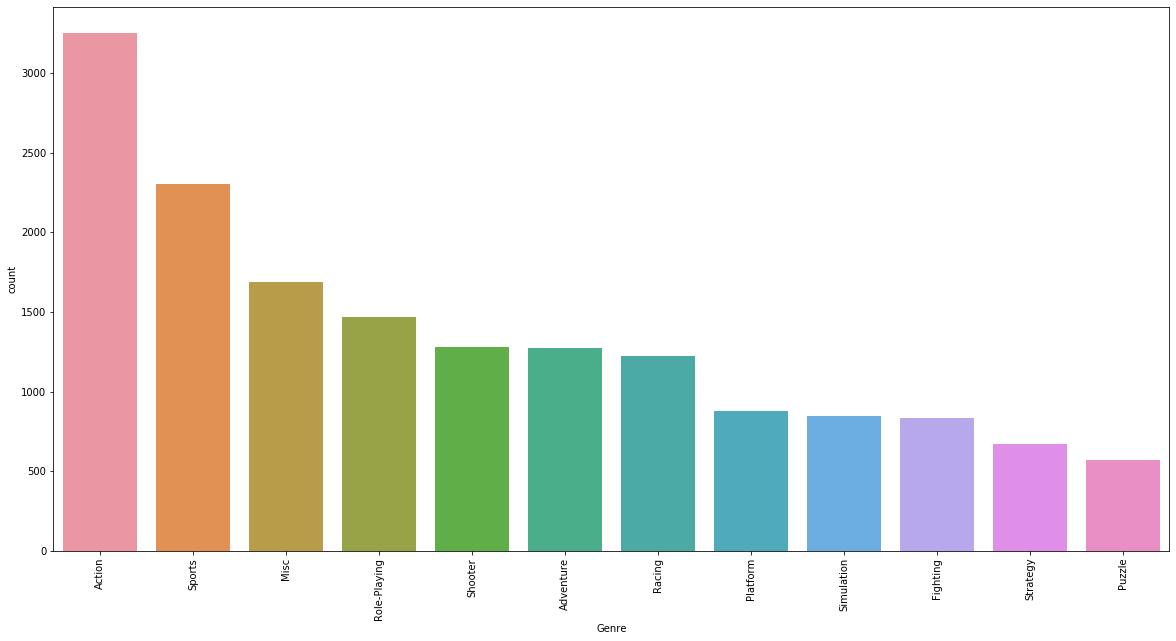

In [41]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Genre", data=gamedf, order = gamedf['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

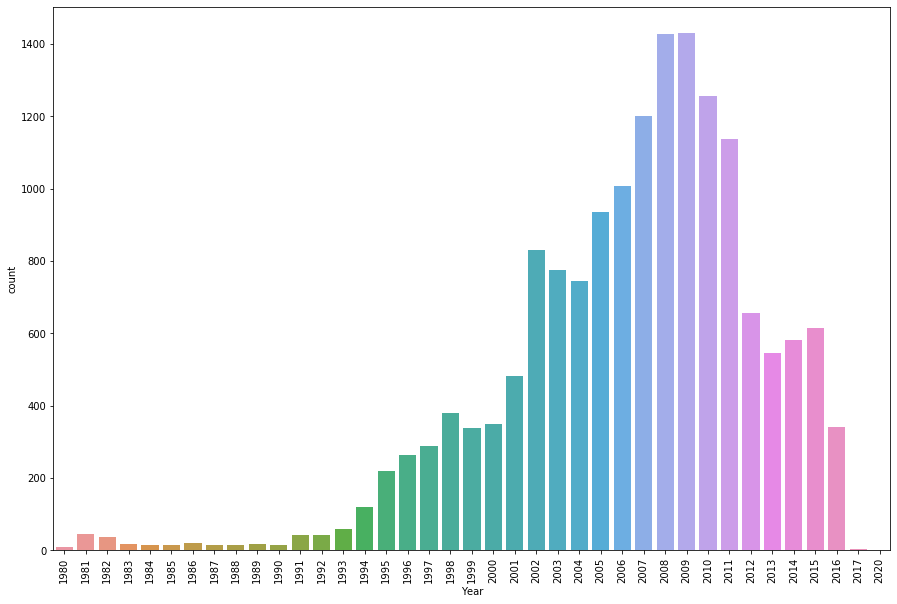

In [42]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=gamedf, order = gamedf.groupby(by=['Year'])['Name'].count().index)
plt.xticks(rotation=90)

In [43]:
gamedf['Genre'].value_counts().index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object')

In [44]:
data_year = gamedf.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
print(data_year)

    Year  Global_Sales
0   1980         11.38
1   1981         35.77
2   1982         28.86
3   1983         16.79
4   1984         50.36
5   1985         53.94
6   1986         37.07
7   1987         21.74
8   1988         47.22
9   1989         73.45
10  1990         49.39
11  1991         32.23
12  1992         76.16
13  1993         45.98
14  1994         79.17
15  1995         88.11
16  1996        199.15
17  1997        200.98
18  1998        256.47
19  1999        251.27
20  2000        201.56
21  2001        331.47
22  2002        395.52
23  2003        357.85
24  2004        414.01
25  2005        458.51
26  2006        521.04
27  2007        609.92
28  2008        678.90
29  2009        667.30
30  2010        600.29
31  2011        515.80
32  2012        363.49
33  2013        368.11
34  2014        337.03
35  2015        264.44
36  2016         70.90
37  2017          0.05
38  2020          0.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

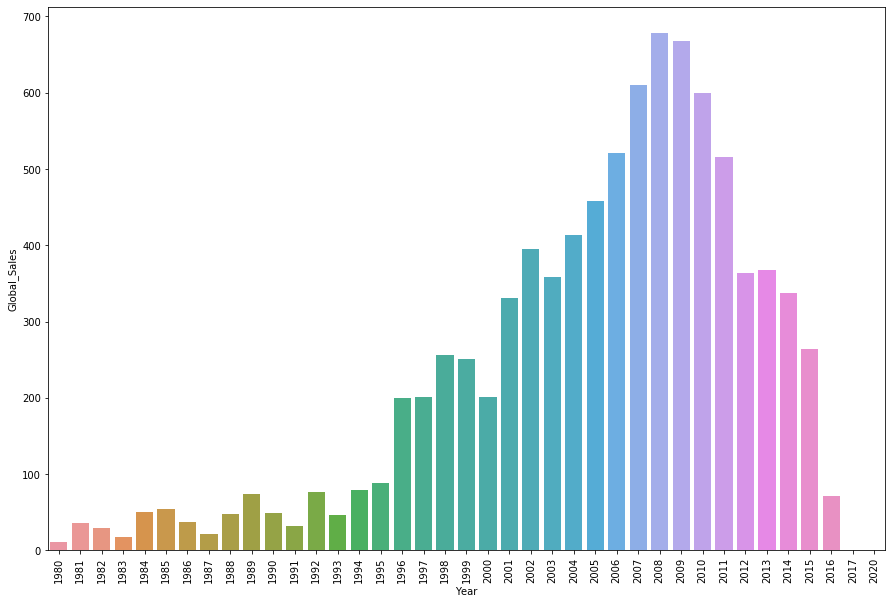

In [45]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

In [46]:
data_genre = gamedf.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
#data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre

,Genre,Global_Sales
0,Action,1722.84
1,Adventure,234.59
2,Fighting,444.05
3,Misc,789.87
4,Platform,829.13
5,Puzzle,242.21
6,Racing,726.76
7,Role-Playing,923.83
8,Shooter,1026.20
9,Simulation,389.98


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

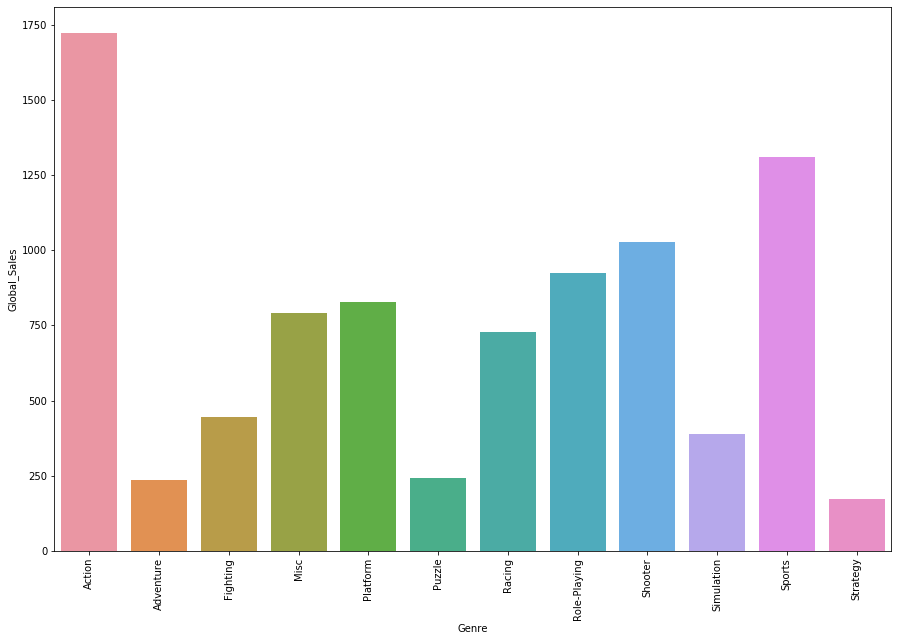

In [47]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

In [48]:
comp_genre = gamedf[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
print(comp_genre)
comp_map = comp_genre.groupby(by=['Genre']).sum()
print(comp_map)

              Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0            Sports     41.49     29.02      3.77         8.46
1          Platform     29.08      3.58      6.81         0.77
2            Racing     15.85     12.88      3.79         3.31
3            Sports     15.75     11.01      3.28         2.96
4      Role-Playing     11.27      8.89     10.22         1.00
...             ...       ...       ...       ...          ...
16593      Platform      0.01      0.00      0.00         0.00
16594       Shooter      0.01      0.00      0.00         0.00
16595        Racing      0.00      0.00      0.00         0.00
16596        Puzzle      0.00      0.01      0.00         0.00
16597      Platform      0.01      0.00      0.00         0.00

[16291 rows x 5 columns]
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          861.77    516.48    158.65       184.92
Adventure       101.93     63.74     51.99        

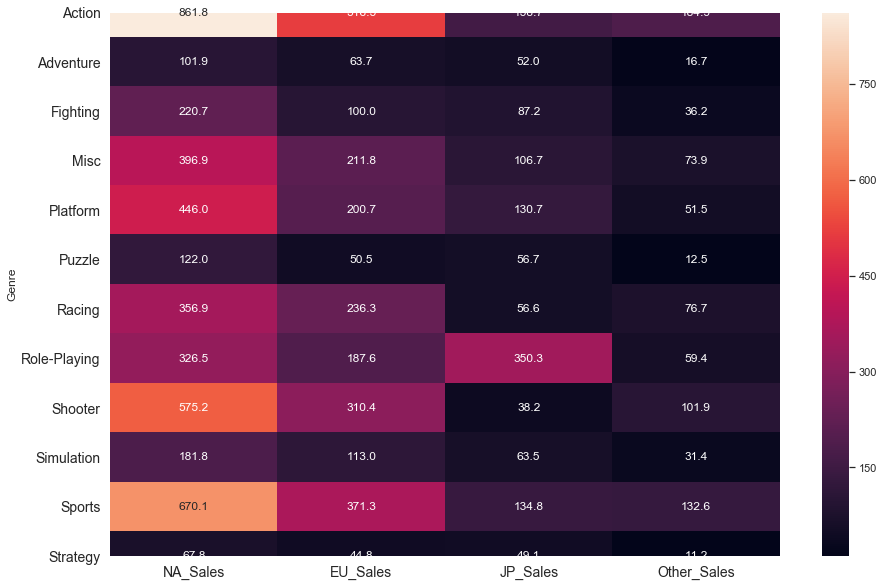

In [49]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#print()
plt.show()
#print()

In [50]:
top_sale_reg = gamedf[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


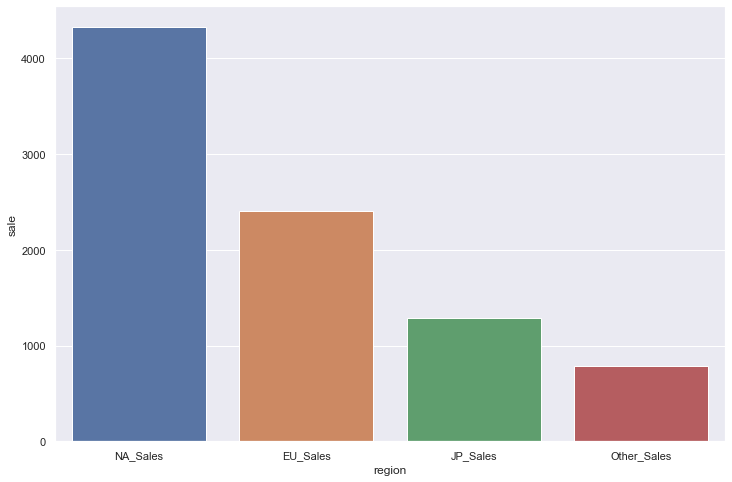

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x20b775c5e88>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

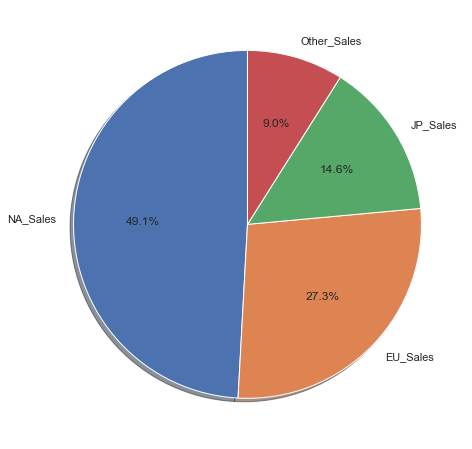

In [52]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)